# Statistical Thinking in Python (Part 2)

## Parameter estimation by optimization

### Optimal parameters

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
nohitters = pd.read_csv('DS\Statistical Thinking in Python (Part 2)\mlb_nohitters.csv')
nohitters.head()

date  game_number winning_team losing_team winning_pitcher
0  18760715          140          NaN         NaN             NaN
1  18800612         1035          NaN         NaN             NaN
2  18800617         1046          NaN         NaN             NaN
3  18800819         1177          NaN         NaN             NaN
4  18800820         1179          NaN         NaN             NaN

In [49]:
nohitter_times = np.array(nohitters['game_number'])

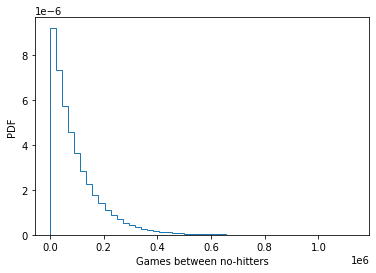

In [50]:
# Seed random number generator
np.random.seed(seed=42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Do the data follow our story?


In [51]:
#From Part 1
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

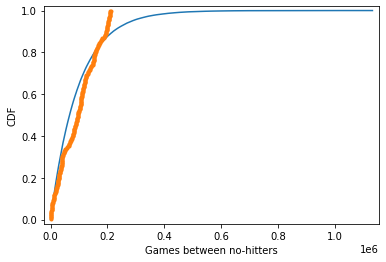

In [52]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


#### How is this parameter optimal?

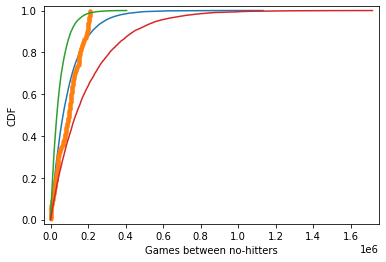

In [53]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Linear regression by least squares

#### EDA of literacy/fertility data

In [54]:
females = pd.read_csv('DS\\Statistical Thinking in Python (Part 2)\\female_literacy_fertility.csv')
females.head()

Country  Continent  female literacy  fertility     population
0      Chine       ASI             90.5      1.769  1,324,655,000
1       Inde       ASI             50.8      2.682  1,139,964,932
2        USA       NAM             99.0      2.077    304,060,000
3  Indon√©sie       ASI             88.8      2.132    227,345,082
4     Br√©sil       LAT             90.2      1.827    191,971,506

In [55]:
illiteracy = np.array(females['female literacy'])
fertility = np.array(females['fertility'])

In [56]:
from sklearn.datasets import load_iris

raw_iris = load_iris()
iris = pd.DataFrame(raw_iris.data, columns=raw_iris.feature_names)
iris['species'] = pd.Categorical.from_codes(raw_iris.target, raw_iris.target_names)
iris.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [57]:
versicolor = iris[iris['species'] == 'versicolor']
versicolor_petal_length = versicolor['petal length (cm)']
versicolor_petal_width = versicolor['petal width (cm)']

In [58]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


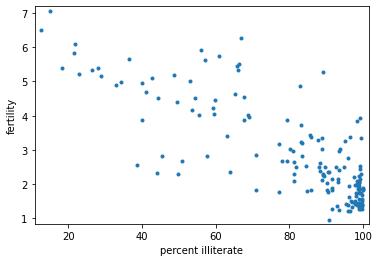

-0.8041324026815347


In [59]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

#### Linear regression

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.867905419699977 children per woman


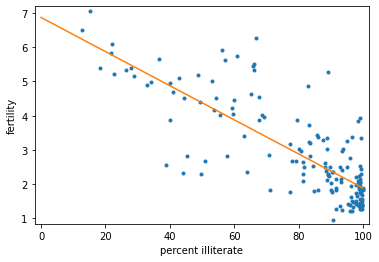

In [60]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


#### How is it optimal?

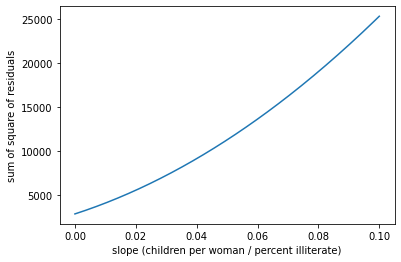

In [61]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, num=200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


### The importance of EDA: Anscombe's quartet


#### Linear regression on appropriate Anscombe data

-0.04979854809063423 6.867905419699976


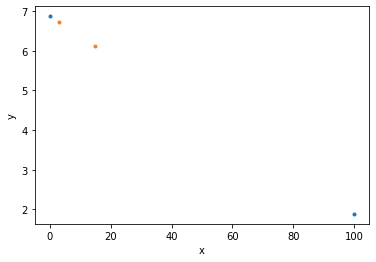

In [62]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, deg=1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

#### Linear regression on all Anscombe data

In [63]:
#Get data
anscombe = pd.read_csv('DS\\Statistical Thinking in Python (Part 2)\\anscombe.csv')
anscombe.head()

0   0.1     1   1.1     2    2.1    3   3.1
0     x     y     x     y     x      y    x     y
1  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
2   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
3  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
4   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84

In [64]:
#Pack data
x1 = np.array(anscombe['0'])[1:].astype(np.float64)
x2 = np.array(anscombe['1'])[1:].astype(np.float64)
x3 = np.array(anscombe['2'])[1:].astype(np.float64)
x4 = np.array(anscombe['3'])[1:].astype(np.float64)

y1 = np.array(anscombe['0.1'])[1:].astype(np.float64)
y2 = np.array(anscombe['1.1'])[1:].astype(np.float64)
y3 = np.array(anscombe['2.1'])[1:].astype(np.float64)
y4 = np.array(anscombe['3.1'])[1:].astype(np.float64)

anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [65]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.001727272727274


## Bootstrap confidence intervals

### Generating bootstrap replicates


#### Visualizing bootstrap samples

In [66]:
#Get data
sheffieldWS = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\sheffield_weather_station.csv", index_col=False, delim_whitespace=True)
sheffieldWS['sun'] = sheffieldWS['sun'].replace('---', 0)
sheffieldWS.head()

yyyy  mm  tmax  tmin  af   rain sun
0  1883   1   6.3   1.7   6  122.1   0
1  1883   2   8.0   2.8   2   69.8   0
2  1883   3   4.8  -1.6  23   29.6   0
3  1883   4  12.2   3.8   2   74.0   0
4  1883   5  14.7   6.2   0   31.2   0

In [67]:
rainfall = sheffieldWS['rain']

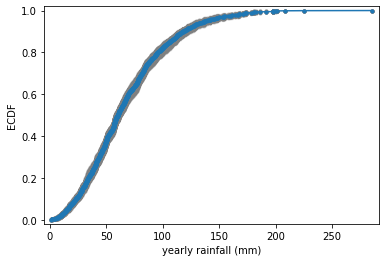

In [68]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Bootstrap confidence intervals


In [69]:
#given f
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [70]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


#### Bootstrap replicates of the mean and the SEM

0.9488593574676786
0.9427722398781045


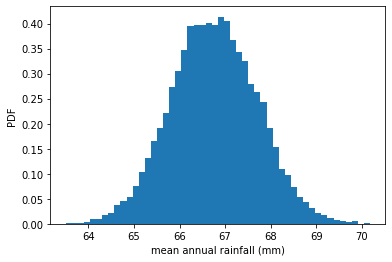

In [71]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#### Bootstrap replicates of other statistics

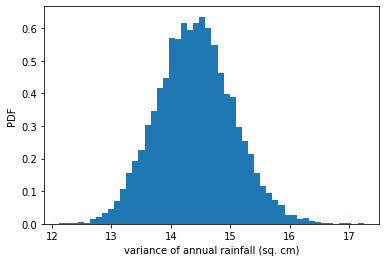

In [72]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Confidence interval on the rate of no-hitters

95% confidence interval = [ 89140.1287415  103927.65238095] games


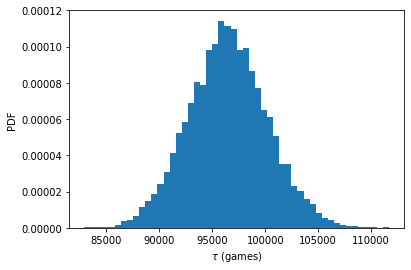

In [73]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


### Pairs bootstrap


#### A function to do pairs bootstrap

In [74]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#### Pairs bootstrap of literacy/fertility data

[-0.05576627 -0.04407149]


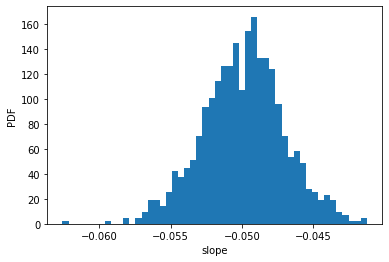

In [75]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

#### Plotting bootstrap regressions

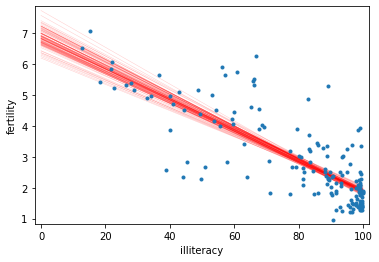

In [76]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Introduction to hypothesis testing

### Formulating and simulating a hypothesis


#### Generating a permutation sample

In [77]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

#### Visualizing permutation sampling

In [78]:
sheffieldWS.head()

yyyy  mm  tmax  tmin  af   rain sun
0  1883   1   6.3   1.7   6  122.1   0
1  1883   2   8.0   2.8   2   69.8   0
2  1883   3   4.8  -1.6  23   29.6   0
3  1883   4  12.2   3.8   2   74.0   0
4  1883   5  14.7   6.2   0   31.2   0

In [79]:
rain_june = sheffieldWS[sheffieldWS['mm']==6]['rain']
rain_november = sheffieldWS[sheffieldWS['mm']==11]['rain']

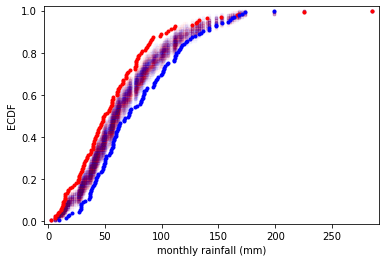

In [80]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

### Test statistics and p-values


#### Generating permutation replicates

In [81]:
 def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

#### Look before you leap: EDA before hypothesis testing

In [82]:
frog = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\frog_tongue.csv", header=14)
frog.head()

date ID  trial number  impact force (mN)  impact time (ms)  \
0  2013_02_26  I             3               1205                46   
1  2013_02_26  I             4               2527                44   
2  2013_03_01  I             1               1745                34   
3  2013_03_01  I             2               1556                41   
4  2013_03_01  I             3                493                36   

   impact force / body weight  adhesive force (mN)  \
0                        1.95                 -785   
1                        4.08                 -983   
2                        2.82                 -850   
3                        2.51                 -455   
4                        0.80                 -974   

   time frog pulls on target (ms)  adhesive force / body weight  \
0                             884                          1.27   
1                             248                          1.59   
2                             211                          1.37   
3                            1025                          0.74   
4                             499                          1.57   

   adhesive impulse (N-s)  total contact area (mm2)  \
0                  -0.290                       387   
1                  -0.181                       101   
2                  -0.157                        83   
3                  -0.170                       330   
4                  -0.423                       245   

   contact area without mucus (mm2)  \
0                                70   
1                                94   
2                                79   
3                               158   
4                               216   

   contact area with mucus / contact area without mucus  \
0                                               0.82      
1                                               0.07      
2                                               0.05      
3                                               0.52      
4                                               0.12      

   contact pressure (Pa)  adhesive strength (Pa)  
0                   3117                   -2030  
1                  24923                   -9695  
2                  21020                  -10239  
3                   4718                   -1381  
4                   2012                   -3975

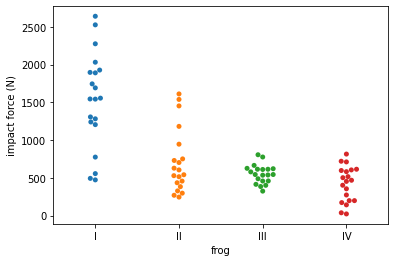

In [83]:
# Make bee swarm plot
_ = sns.swarmplot(data=frog, x='ID', y = 'impact force (mN)')

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

#### Permutation test on frog data

In [84]:
force_a = frog[frog['ID'] == 'I']['impact force (mN)']

In [85]:
force_b = frog[frog['ID'] == 'II']['impact force (mN)']

In [86]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


### Bootstrap hypothesis tests

#### A one-sample bootstrap hypothesis test

In [87]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b.sub(force_b.mean()) + 0.55 
translated_force_b

20    905.2
21   -101.8
22   -379.8
23    239.2
24   -165.8
25    832.2
26   -177.8
27    -78.8
28    746.2
29   -409.8
30     -3.8
31   -437.8
32     44.2
33   -461.8
34    475.2
35   -191.8
36   -271.8
37   -323.8
38   -249.8
39     23.2
Name: impact force (mN), dtype: float64

In [88]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - force_b.mean() + 0.55 

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  1.0


#### A two-sample bootstrap hypothesis test for difference of means

In [89]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

NameError: name 'forces_concat' is not defined

## A/B testing

#### The vote for the Civil Rights Act in 1964


In [90]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136 + [False]*35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems == True) / dems.size
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


#### A time-on-website analog

In [91]:
#Get data
nh = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\mlb_nohitters.csv")
nh.head()

nht_dead = nh[nh["date"]>=19200101]["game_number"]
nht_live = nh[nh["date"]< 19200101]["game_number"]

In [92]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,size=10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 1.0


### Test of correlation


#### Hypothesis test on Pearson correlation

In [93]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates>=r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 1.0


#### Do neonicotinoid insecticides have unintended consequences?

In [94]:
#Get data
bee = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\bee_sperm.csv", skiprows = 3)
bee.head()


Specimen Treatment Environment  TreatmentNCSS Sample ID  Colony  Cage  \
0       227   Control        Cage              1    C2-1-1       2     1   
1       228   Control        Cage              1    C2-1-2       2     1   
2       229   Control        Cage              1    C2-1-3       2     1   
3       230   Control        Cage              1    C2-1-4       2     1   
4       231   Control        Cage              1    C2-1-5       2     1   

   Sample  Sperm Volume per 500 ul  Quantity  ViabilityRaw (%)    Quality  \
0       1                  2150000   2150000  96.7263814616756  96.726381   
1       2                  2287500   2287500  96.3498079760595  96.349808   
2       3                    87500     87500             98.75  98.750000   
3       4                  1875000   1875000  93.2874208336941  93.287421   
4       5                  1587500   1587500  97.7925061050061  97.792506   

   Age (d)  Infertil  AliveSperm  Quantity Millions  Alive Sperm Millions  \
0       14         0     2079617             2.1500              2.079617   
1       14         0     2204001             2.2875              2.204001   
2       14         0       86406             0.0875              0.086406   
3       14         0     1749139             1.8750              1.749139   
4       14         0     1552456             1.5875              1.552456   

   Dead Sperm Millions  
0             0.070383  
1             0.083499  
2             0.001094  
3             0.125861  
4             0.035044

In [95]:
control = np.array(bee[bee["Treatment"] == "Control"]["AliveSperm"].reset_index(drop=True))
control


array([2079617, 2204001,   86406, 1749139, 1552456, 2582087, 3307631,
       2316533,   85204, 1325000,   43750,  998574, 3463340, 2287466,
       1948233, 2604907, 1853125,       0, 2312725, 1507220,  366326,
        200000, 3259191, 2612500, 3109371, 3420179,  605654,  184126,
       1799685, 2106079, 3026182, 1057766, 3302065, 2630370, 3028475,
       3240586, 1585761, 1528614,  109404, 2607556, 2232584, 1144545,
       1866286, 1085435,  917163, 3037431, 2920989, 4262446, 2349246,
       1482812, 1162103, 1704706, 2415363,   50000,       0, 2050716,
       1739081,  504844, 2499648, 2160980,  149796, 1803016, 3770130,
       2142012,   28747, 3018334, 1462042, 2075072,  628463, 2333251,
       2403297, 1262390, 1013827, 1261415, 2367799, 1016618,       0,
       3088647, 1300917, 1772204, 1802250, 2760173, 2403490, 1501239,
       1779908, 3537922, 5000000,   69886, 3085855, 1600616, 4229773,
         89285, 3544138, 2748331, 2707543,  966141, 1514190, 3739980,
        931295, 3919

In [96]:
treated = np.array(bee[(bee["Treatment"] != "Control")]["AliveSperm"].reset_index(drop=True))
treated


array([ 671343,  529238, 1896892,  202140, 2264194, 1071483, 1968871,
         68750, 3459582,       0, 1798906, 2598269, 1394775, 1161450,
        545318, 2661958,  510809,  465918, 1390000,  206101,  590467,
       1433700,       0,   32177, 1504174,  438317,       0, 2485856,
       3640329, 2398660, 1042478, 1625757,  970250,  783096,  294470,
       2609829,  488988, 1562292,  648782,  716664, 2121685,  440482,
       1188283, 1881829,  959213, 1870000, 1920863, 2349820, 2193438,
             0,  563716,  922726,  345157, 2092801, 1142366, 3618797,
       1092574, 1399562, 1716090,  316770,  571248,  293000, 1186429,
        900160, 1664653, 2014402, 1737078, 3754376, 1016412,  668278,
        953248,  698023, 1244052, 2379557,  539265, 1599635, 1907126,
       2137981, 1408528,  276099, 1635970, 2557625, 1032314,       0,
       1670505, 3088661,       0, 1832075, 1176291,  765848], dtype=int64)

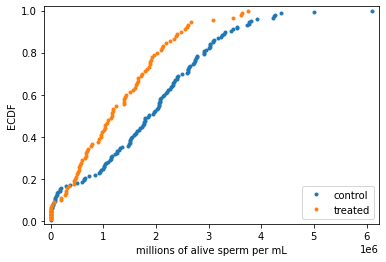

In [97]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

#### Bootstrap hypothesis test on bee sperm counts

In [98]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.concatenate((control, treated)).mean()

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


## Putting it all together: a case study

### Finch beaks and the need for statistics


In [99]:
#Get data
beak_1975 = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\finch_beaks_1975.csv").rename(columns = {"Beak length, mm": "beak_lenght", "Beak depth, mm": "beak_depth"})
beak_1975["year"] = 1975
beak_1975.head()


band species  beak_lenght  beak_depth  year
0     2  fortis          9.4         8.0  1975
1     9  fortis          9.2         8.3  1975
2    12  fortis          9.5         7.5  1975
3    15  fortis          9.5         8.0  1975
4   305  fortis         11.5         9.9  1975

In [100]:
#Get data
beak_2012 = pd.read_csv("DS\\Statistical Thinking in Python (Part 2)\\finch_beaks_2012.csv").rename(columns = {"blength": "beak_lenght", "bdepth": "beak_depth"})
beak_2012["year"] = 2012
beak_2012.head()

band species  beak_lenght  beak_depth  year
0  19022  fortis         10.0         8.5  2012
1  19028  fortis         12.5         8.9  2012
2  19032  fortis          9.3         7.5  2012
3  19041  fortis         10.3         9.6  2012
4  19044  fortis         11.0         9.2  2012

In [101]:
df = beak_1975[["beak_depth", "beak_lenght", "year"]].merge(beak_2012[["beak_depth","beak_lenght", "year"]], on=["beak_depth", "beak_lenght", "year"], how="outer")

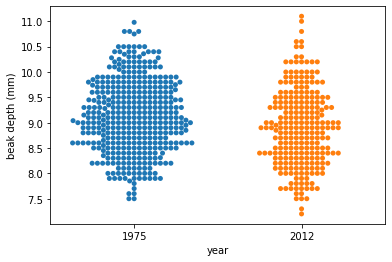

In [102]:
# Create bee swarm plot
_ = sns.swarmplot(data=df, x="year", y="beak_depth")

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

#### ECDFs of beak depths

In [103]:
bd_1975 = np.array(beak_1975["beak_depth"])
bd_2012 = np.array(beak_2012["beak_depth"])

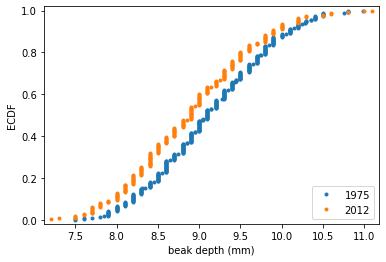

In [104]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

#### Parameter estimates of beak depths

In [105]:
# Compute the difference of the sample means: mean_diff
mean_diff = diff_of_means(bd_1975, bd_2012)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22313275434243174 mm
95% confidence interval = [-0.33933801 -0.1058619 ] mm


#### Hypothesis test: Are beaks deeper in 2012?

In [106]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size = 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size = 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', '{0:.22f}'.format(p))


p = 0.0002000000000000000096


Yes they are üòä

#### EDA of beak length and depth

c:\users\c.matas.hidalgo\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


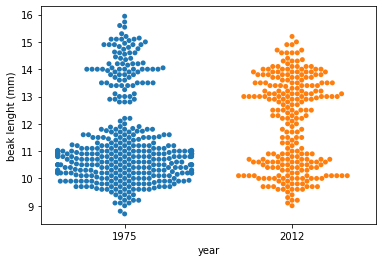

In [107]:
# Create bee swarm plot
_ = sns.swarmplot(data=df, x="year", y="beak_lenght")

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak lenght (mm)')

# Show the plot
plt.show()

In [108]:
bl_1975 = np.array(beak_1975["beak_lenght"])
bl_2012 = np.array(beak_2012["beak_lenght"])

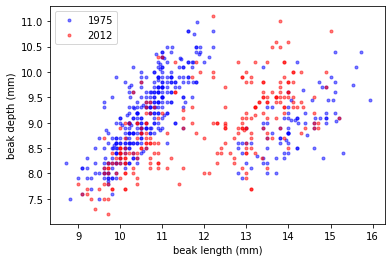

In [109]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color="blue", alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='None', color="red", alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

#### Linear regressions

In [110]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, deg = 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, deg = 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.0945968320892116 conf int = [0.05418928 0.13109919]
1975: intercept = 8.053907980716424 conf int = [7.63370885 8.50904045]
2012: slope = 0.27942148396112504 conf int = [0.23409017 0.32092428]
2012: intercept = 5.548559204612315 conf int = [5.06245139 6.08744707]


#### Displaying the linear regression results

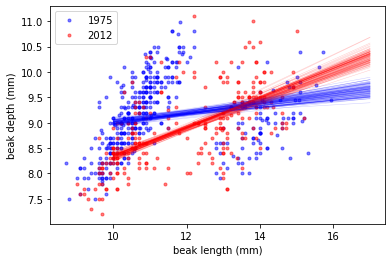

In [111]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color="blue")
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color="red")

# Draw the plot again
plt.show()

#### Beak length to depth ratio

In [112]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.2461609991094327 conf int = [1.22277703 1.26993276]
2012: mean ratio = 1.3483617710027853 conf int = [1.32440105 1.37308557]


### Calculation of heritability


#### EDA of heritability

In [117]:
bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

bd_parent_scandens = np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 ,
        8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127,
        8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258,
        8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974,
        8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804,
        9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992,
        9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707,
        9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217,
        9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632,
        9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481,
        9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235,
        9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989,
        9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083,
        9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119,
        9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516,
        9.7572,  9.8854, 10.0023,  9.3914])

bd_offspring_fortis = np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65,
        8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74,
        9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 ,
        9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18,
       10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82,
       10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23,
        8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19,
        9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54,
        8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 ,
        8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47,
        8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 ,
       10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89,
        9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43,
        9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14,
       10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25,
       10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93,
       10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53,
        9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14,
       10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05,
       10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83,
        8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38,
       10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97,
        8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95,
        8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 ,
        9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 ,
        7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 ,
        8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  ,
        9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 ,
        8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64,
        9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18,
        8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18,
        8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81,
        8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58,
        9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 ,
        9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65,
        9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 ,
        8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 ,
        9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])

bd_offspring_scandens = np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025,
        8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747,
        8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785,
        9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949,
        8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671,
        8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759,
        9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013,
        8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772,
        8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089,
        9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342,
        8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633,
        9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354,
       10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203,
        8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671,
        9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899,
        9.5962,  9.6873,  9.5203,  9.6646])

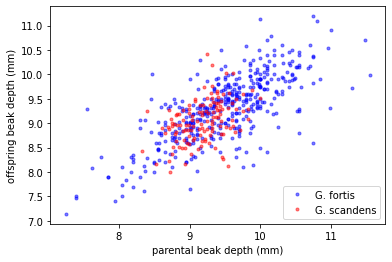

In [118]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle="none", color="blue", alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle="none", color="red", alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


#### Correlation of offspring and parental data

In [120]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = bs_inds[0], bs_inds[1]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

#### Pearson correlation of offspring and parental data

In [121]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens,bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis =  draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis =  np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


c:\users\c.matas.hidalgo\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\users\c.matas.hidalgo\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\users\c.matas.hidalgo\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


G. scandens: 0.41170636294012586 [nan nan]
G. fortis: 0.7283412395518484 [nan nan]


#### Measuring heritability

In [122]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0][1] / covariance_matrix[0][0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
       bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685983 [nan nan]
G. fortis: 0.7229051911438155 [nan nan]


<ipython-input-122-7ca5912ae302>:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance_matrix = np.cov(parents, offspring)


#### Is beak depth heritable at all in G. scandens?

In [123]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0
